In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from fastai.data.all import *
from fastai.vision.all import *
import PIL
from pathlib import Path
import os
from fastprogress.fastprogress import master_bar, progress_bar

In [ ]:
!wget https://github.com/dizys/nyu-cv-final-project/releases/download/dataset/NYU_CV_RVAP_dataset_1.0.0.zip
!mkdir -p /content/dataset
!unzip -qq NYU_CV_RVAP_dataset_1.0.0.zip -d /content/dataset

In [3]:
def label_func(fpath: Path):
  label = "original" if "original/" in str(fpath.absolute()) else "ai"
  return label

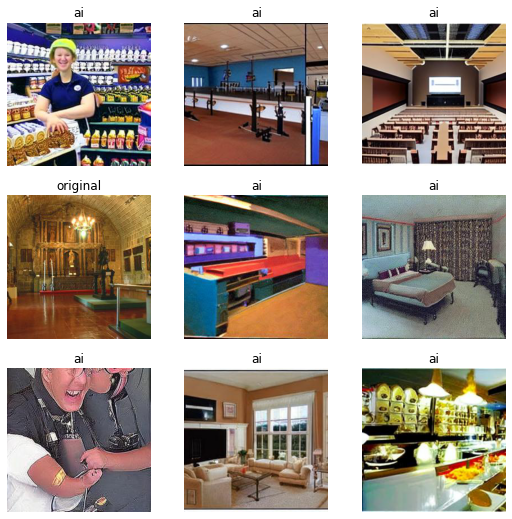

In [4]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter())

dls = dblock.dataloaders("dataset")
dls.show_batch()

In [28]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.236638,0.142990,0.945583,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.064619,0.050961,0.982074,00:31


In [30]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.034862,0.058726,0.983195,00:26


epoch,train_loss,valid_loss,accuracy,time
0,0.026607,0.034412,0.988796,00:31


In [31]:
models_path = Path("/content/drive/MyDrive/Studies/Master Studies/Fall 2022/Computer Vision/Final Project/models")

In [35]:
!mkdir -p {models_path}
learn.save(models_path / "resnet34")

Path('/content/drive/MyDrive/Studies/Master Studies/Fall 2022/Computer Vision/Final Project/models/resnet34.pth')

In [36]:
learn.load(models_path / "resnet34")

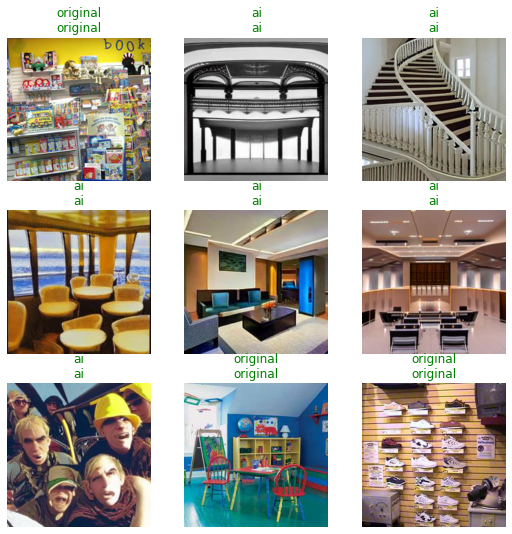

In [37]:
learn.show_results()

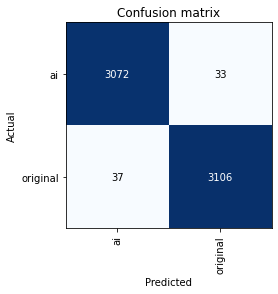

In [38]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

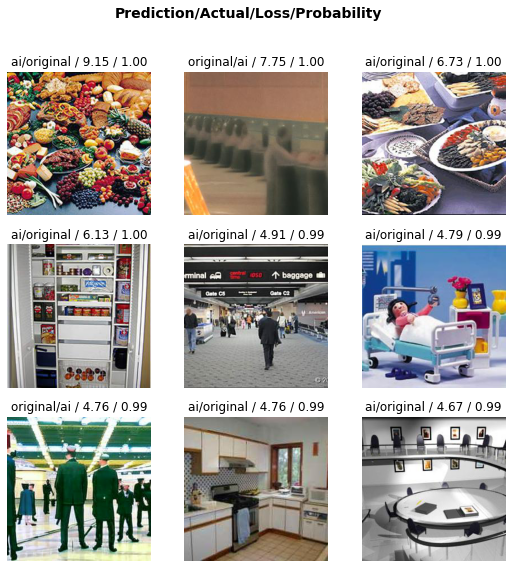

In [39]:
interpretation.plot_top_losses(9)